# TFT Diamond Match EDA and Regression Model

During my free time, I enjoy playing games, and one of the games that I've enjoyed recently is Teamfight Tactics, or TFT for short. This game is an "auto chess" game, which is essentially a type of game where you buy pieces, put them onto your board, and battle the boards of opposing players. Apart from different types of pieces, there are also different types of synergies that these pieces can make together, giving different bonuses to the rest of your board. Having reached the "Diamond" rank (top 5% of players in the U.S.) I wanted to get a closer look at the games within Diamond.

Essentially, the pieces that you acquire and the synergies that you make have a huge impact on whether you win or lose, and so I wanted to answer a few questions using data:
 - What synergies are most present within winning team compositions?
 - How many active synergies do most winners have?
 - Can we predict whether an individual will win the lobby based off of their synergies?
 


# Exploratory Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from scipy import io

#load data
tft = pd.read_csv("TFT_Diamond_MatchData.csv")

#### Here are definitions for each column:

 - gameId : Unique ID of the match played
 - gameDuration : Total duration of game in seconds
 - level : Level of the tactitian by the end of the game
 - lastRound : Round in which the player exits the game (either by dying or winning)
 - Ranked : Place that the player was ranked, out of 8
 - ingameDuration : Total amount of seconds that the player lasted in the game
 - combination : String of the total amount of synergies used by player, whether they were active or inactive
 - champion : String of the total amount of champions used by player, along with their star level, and any items on them

In [4]:
tft

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4357546733,2326.065674,8,37,4,2089.551514,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 2, 'S...","{'JarvanIV': {'items': [2, 58], 'star': 3}, 'S..."
1,KR_4357546733,2326.065674,7,26,7,1467.931519,"{'Chrono': 1, 'Cybernetic': 1, 'Infiltrator': ...","{'Malphite': {'items': [], 'star': 3}, 'KhaZix..."
2,KR_4357546733,2326.065674,7,26,8,1464.743164,"{'DarkStar': 1, 'Protector': 1, 'Set3_Mystic':...","{'Poppy': {'items': [25, 27], 'star': 3}, 'Zoe..."
3,KR_4357546733,2326.065674,8,35,5,2008.209961,"{'Chrono': 2, 'Cybernetic': 1, 'Infiltrator': ...","{'TwistedFate': {'items': [], 'star': 3}, 'Mal..."
4,KR_4357546733,2326.065674,7,41,2,2317.777588,"{'DarkStar': 1, 'Demolitionist': 2, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."
...,...,...,...,...,...,...,...,...
79995,KR_4292081553,1940.184082,7,35,1,1924.018433,"{'Demolitionist': 1, 'ManaReaver': 2, 'Mercena...","{'Darius': {'items': [], 'star': 2}, 'Rakan': ..."
79996,KR_4292081553,1940.184082,8,35,2,1924.018433,"{'Chrono': 1, 'Cybernetic': 1, 'Rebel': 5, 'Se...","{'Malphite': {'items': [], 'star': 3}, 'Fiora'..."
79997,KR_4292081553,1940.184082,7,24,6,1307.824585,"{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 1}, 'Poppy'..."
79998,KR_4292081553,1940.184082,5,23,7,1238.752075,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 1, '...","{'TwistedFate': {'items': [], 'star': 1}, 'Cai..."


#### Now I'd like to further analyze the winners (top 1) of each game, as well as the top 4 of each game, so I create new dataframes accordingly

In [38]:
#creating a data frame for winners and top4
winners = tft[tft['Ranked'] == 1]
top4 = tft[tft['Ranked'] <= 4]

In [6]:
winners

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
6,KR_4357546733,2326.065674,9,41,1,2317.777588,"{'Chrono': 2, 'DarkStar': 1, 'Set3_Mystic': 1,...","{'TwistedFate': {'items': [29, 48], 'star': 3}..."
15,KR_4386549686,2108.342285,9,38,1,2100.056152,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [44, 44], 'star': 3}, 'Mal..."
20,KR_4313467722,2189.067627,8,40,1,2180.853271,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
24,KR_4241537045,2139.184326,8,37,1,2130.846191,"{'DarkStar': 2, 'Demolitionist': 1, 'ManaReave...","{'JarvanIV': {'items': [], 'star': 2}, 'Sona':..."
34,KR_4380028917,1923.175171,8,35,1,1914.849854,"{'Blaster': 1, 'Chrono': 2, 'DarkStar': 1, 'De...","{'Jayce': {'items': [55, 36, 68], 'star': 2}, ..."
...,...,...,...,...,...,...,...,...
79964,KR_4294426407,2380.208496,8,41,1,2371.966064,"{'Protector': 1, 'Set3_Celestial': 1, 'Set3_My...","{'Poppy': {'items': [99, 2, 11], 'star': 3}, '..."
79969,KR_4294352384,1984.134644,8,35,1,1975.894287,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...","{'Ziggs': {'items': [], 'star': 2}, 'Malphite'..."
79979,KR_4293641920,1935.873413,9,35,1,1927.635254,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 1, '...","{'Graves': {'items': [], 'star': 2}, 'Leona': ..."
79985,KR_4292089344,2020.147461,7,37,1,2011.839233,"{'Chrono': 1, 'Cybernetic': 2, 'ManaReaver': 2...","{'Fiora': {'items': [7], 'star': 2}, 'Xayah': ..."


One issue with the 'combination' column is that the items within it are ultimately a string, even though it looks like a dictionary or a list. In order to make the information easier to process and train, I wanted to clean up the strings into easy to work with lists. To do so, I first removed the curly brackets and any spaces, then I also removed the "Set3_" prefix that was present in some of the traits. Finally, I split the string on every instance of a comma, thus making a list of strings with the synergy name and quantity.

In [7]:
temp1 = winners['combination'].str.replace('{','')

In [8]:
temp2 = temp1.str.replace('}','')

In [9]:
temp3 = temp2.str.replace(' ', '')

In [10]:
temp4 = temp3.str.replace('Set3_', '')

In [11]:
winners_all_traits = temp4.str.split(',')

Now we have a much more manageable array of strings. What I wanted to do from here was to obtain the value count of the synergies within the series, however it was difficult since each row contained it's own list. In order to get the value count of each trait, I essentially flattened the data into a new data frame, and got the value count there

In [141]:
winners_all_traits

6        ['Chrono':2, 'DarkStar':1, 'Mystic':1, 'Sorcer...
15       ['Blaster':2, 'Demolitionist':2, 'Mercenary':2...
20       ['Blaster':4, 'Chrono':2, 'Cybernetic':2, 'Mer...
24       ['DarkStar':2, 'Demolitionist':1, 'ManaReaver'...
34       ['Blaster':1, 'Chrono':2, 'DarkStar':1, 'Demol...
                               ...                        
79964    ['Protector':1, 'Celestial':1, 'Mystic':2, 'So...
79969    ['Blaster':2, 'Demolitionist':2, 'Mercenary':1...
79979    ['Blaster':2, 'Chrono':2, 'Cybernetic':1, 'Dar...
79985    ['Chrono':1, 'Cybernetic':2, 'ManaReaver':2, '...
79995    ['Demolitionist':1, 'ManaReaver':2, 'Mercenary...
Name: combination, Length: 10000, dtype: object

In [13]:
a = pd.Series([item for sublist in winners_all_traits for item in sublist])

In [14]:
df = a.value_counts().sort_index().rename_axis('x').reset_index(name='f')

In [15]:
df.sort_values(by=['f'], ascending = False)

,x,f
36,'Chrono':2,5289
46,'Cybernetic':1,4288
106,'Mercenary':1,4078
216,'Void':1,3385
53,'DarkStar':1,3292
...,...,...
124,'Poison':4,1
126,'Predator':2,1
158,'Set2_Glacial':6,1
153,'Set2_Blademaster':3,1


Looking at the table, I realize that there is a big problem. Many of the synergies within the value count are inactive synergies. What I mean by this is that some synergies require a minimum amount of pieces to activate, for example Dark Star requires 3 "Dark Star" champions on the board in order to activate. We see that "Dark Star : 1" was the 5th most popular trait amongst winners, but we can deduce that they did not receive any bonus from having that one Dark Star unit in, thus making it not the best indicator of winning synergies. On top of this, there were also a few synergies from the previous set which were not even being used in the current set. Because of these two reasons, I wanted to clean up the data and only show synergies that were active. 

In [16]:
#making a list of all possible synergies within set 3
active_synergies = ["'Mercenary':1", "'Blademaster':3", "'Blademaster':6", "'Blademaster':9", "'Mystic':2",
                   "'Mystic':4", "'Mystic':6", "'Starship':1", "'Brawler':2", "'Brawler':4",
                    "'Infiltrator':2", "'Infiltrator':4", "'Sorcerer':2", "'Sorcerer':4",
                    "'Sorcerer':6", "'Sorcerer':8", "'Protector':2", "'Protector':4", "'ManaReaver':2",
                    "'Blaster':2", "'Blaster':4", "'Demolitionist':2", "'Sniper':2", "'Vanguard':2","'Vanguard':4",
                   "'Celestial':2", "'Celestial':4", "'Celestial':6", "'Chrono':2", "'Chrono':4", "'Chrono':6",
                   "'Cybernetic':3", "'Cybernetic':6", "'DarkStar':3", "'DarkStar':6", "'DarkStar':9", "'MechPilot':3",
                   "'Rebel':3", "'Rebel':6", "'Rebel':9", "'SpacePirate':2", "'SpacePirate':4", "'StarGuardian':3",
                   "'StarGuardian':6", "'Valkyrie':2", "'Void':3"]

In [17]:
winners_active_traits = df[df['x'].isin(active_synergies)]

Now that we have a list of only active synergies, I wanted to see which synergies were most prevalent amongst the winners. We see that the top performing synergy is Chrono: 2. This makes sense because in set 3, 2 Chrono champions were relatively easy to fit into your composition, and the buff for Chronos was beneficial for many different characters, making it a very adaptable trait that was easy to complete. Following that trend, we see that many of the most popular traits were few in number, signifying that perhaps instead of having a team that was all one trait (like 9 blademasters), it was better to have a team with various smaller, and different traits sprinkled in.

In [18]:
winners_active_traits.sort_values(by=['f'], ascending = False)

,x,f
36,'Chrono':2,5289
106,'Mercenary':1,4078
98,'ManaReaver':2,3215
10,'Blademaster':3,2518
208,'Valkyrie':2,2484
26,'Brawler':4,2459
172,'Sniper':2,2113
212,'Vanguard':2,2006
64,'Demolitionist':2,1977
29,'Celestial':2,1971


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

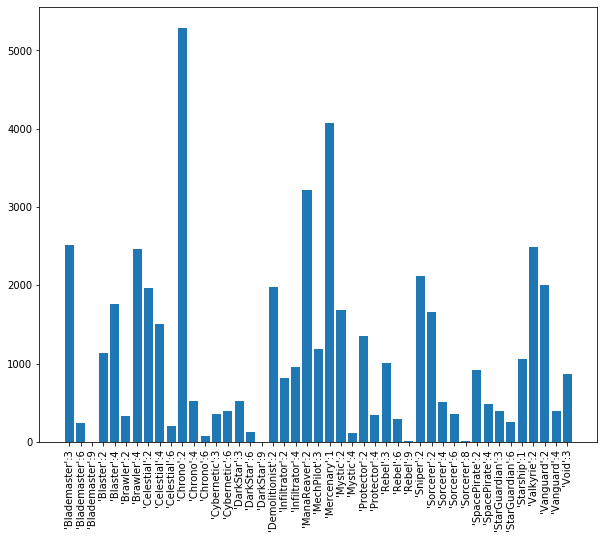

In [19]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
plt.bar(winners_active_traits['x'], height = winners_active_traits['f'])
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')

While getting 1st place grants the most points, you can still get points from placing within the top 4, so I wanted to see the most popular traits within the top 4 winners and see if there were any notable differences. The main differences I could tell at first glance was that Brawler : 4 did significantly better with the top 4 players than in the winners. This might imply that having 4 Brawlers has a high chance of getting someone to top 4, but not so much getting them to 1st place.

In [21]:
temp1 = top4['combination'].str.replace('{','')
temp2 = temp1.str.replace('}','')
temp3 = temp2.str.replace(' ', '')
temp4 = temp3.str.replace('Set3_', '')
top4_all_traits = temp4.str.split(',')
a = pd.Series([item for sublist in top4_all_traits for item in sublist])
df = a.value_counts().sort_index().rename_axis('x').reset_index(name='f')
top4_active_traits = df[df['x'].isin(active_synergies)]
top4_active_traits.sort_values(by=['f'], ascending = False)

,x,f
38,'Chrono':2,20211
122,'Mercenary':1,15323
114,'ManaReaver':2,12038
11,'Blademaster':3,10078
28,'Brawler':4,10020
234,'Valkyrie':2,8838
196,'Sniper':2,8266
31,'Celestial':2,7365
22,'Blaster':4,7332
68,'Demolitionist':2,6948


#### Adding the list of active traits to the whole tft dataset

In [23]:
temp1 = tft['combination'].str.replace('{','')
temp2 = temp1.str.replace('}','')
temp3 = temp2.str.replace(' ', '')
temp4 = temp3.str.replace('Set3_', '')
tft_all_traits = temp4.str.split(',')
a = pd.Series([item for sublist in tft_all_traits for item in sublist])
df = a.value_counts().sort_index().rename_axis('x').reset_index(name='f')
tft_active_traits = df[df['x'].isin(active_synergies)]

In [24]:
active_traits = []
for row in tft_all_traits:
    ar = []
    for item in row:
        if item in active_synergies:
            ar.append(item)
    active_traits.append(ar)

In [26]:
tft['active traits'] = active_traits

#### Adding the amount of active traits used by the player

In [27]:
counts = []
for row in tft['active traits']:
    counts.append(len(row))

In [28]:
tft['# of active traits'] = counts

In [29]:
tft

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion,active traits,# of active traits
0,KR_4357546733,2326.065674,8,37,4,2089.551514,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 2, 'S...","{'JarvanIV': {'items': [2, 58], 'star': 3}, 'S...","['Protector':4, 'Celestial':2]",2
1,KR_4357546733,2326.065674,7,26,7,1467.931519,"{'Chrono': 1, 'Cybernetic': 1, 'Infiltrator': ...","{'Malphite': {'items': [], 'star': 3}, 'KhaZix...","['Brawler':4, 'Void':3]",2
2,KR_4357546733,2326.065674,7,26,8,1464.743164,"{'DarkStar': 1, 'Protector': 1, 'Set3_Mystic':...","{'Poppy': {'items': [25, 27], 'star': 3}, 'Zoe...","['Sorcerer':4, 'StarGuardian':6]",2
3,KR_4357546733,2326.065674,8,35,5,2008.209961,"{'Chrono': 2, 'Cybernetic': 1, 'Infiltrator': ...","{'TwistedFate': {'items': [], 'star': 3}, 'Mal...","['Chrono':2, 'Infiltrator':2, 'Brawler':4, 'So...",5
4,KR_4357546733,2326.065674,7,41,2,2317.777588,"{'DarkStar': 1, 'Demolitionist': 2, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ...","['Demolitionist':2, 'Infiltrator':4, 'MechPilo...",4
...,...,...,...,...,...,...,...,...,...,...
79995,KR_4292081553,1940.184082,7,35,1,1924.018433,"{'Demolitionist': 1, 'ManaReaver': 2, 'Mercena...","{'Darius': {'items': [], 'star': 2}, 'Rakan': ...","['ManaReaver':2, 'Mercenary':1, 'Celestial':4,...",4
79996,KR_4292081553,1940.184082,8,35,2,1924.018433,"{'Chrono': 1, 'Cybernetic': 1, 'Rebel': 5, 'Se...","{'Malphite': {'items': [], 'star': 3}, 'Fiora'...",['Starship':1],1
79997,KR_4292081553,1940.184082,7,24,6,1307.824585,"{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 1}, 'Poppy'...","['Blaster':2, 'Brawler':2]",2
79998,KR_4292081553,1940.184082,5,23,7,1238.752075,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 1, '...","{'TwistedFate': {'items': [], 'star': 1}, 'Cai...","['Blaster':2, 'Chrono':2]",2


Going back to the winner dataframe, I wanted to see how many active traits the typical winner has on their board. It seemed that the majority of winners had 6 active traits within their board, which is quite a high amount. This supports the theory that I had stated previously, that it seems more beneficial to have multiple, small synergies as opposed to having one big synergy.

In [142]:
#recreating the winner and top4 data frames after adding extra columns
winners = tft[tft['Ranked'] == 1]
top4 = tft[tft['Ranked'] <= 4]

In [143]:
winners['# of active traits'].value_counts().count

<bound method Series.count of 5     2803
6     2304
4     2187
3      937
7      893
8      397
2      321
1       57
9       51
0       49
10       1
Name: # of active traits, dtype: int64>

# Creating a Model for the Data

## Linear Regression

Using the data from Kaggle, I wanted to see if I can create a model that can accurately predict what place a player would rank based off of their team composition, amount of synergies, and levels. Since the y value that we are testing for in this case is a continuous value between 1-8, I decided to use linear regression for my model.

#### First, I clean the data by dropping columns that have irrelevant information, such as the game ID since this is unique to every game, and game duration, since it is already obvious to players that the longer one is in the game, the higher they place. I also decided to remove the 'combination' and 'champion' columns because of the fact that they consisted of long strings, so making the dummy variables was very impractical. 

In [63]:
#cleaning data by dropping irrelevant columns
cleantft = tft.drop(['gameId', 'gameDuration', 'lastRound', 'ingameDuration', 'combination', 'champion'], axis = 1)

#### Here I proceeded to make dummy variables out of the data. We need to do this because we cannot use categorical data when training regression, and thus we must input categorical data in the form of individual boolean columns known as dummy variables.

In [65]:
cleantft_dummy = pd.get_dummies(cleantft['active traits'].apply(pd.Series).stack()).sum(level=0)

In [71]:
cleantft_dummy['level'] = cleantft['level']
cleantft_dummy['# of active traits'] = cleantft['# of active traits']
cleantft_dummy['Ranked'] = cleantft['Ranked']

In [68]:
cleantft_dummy

,'Blademaster':3,'Blademaster':6,'Blademaster':9,'Blaster':2,'Blaster':4,'Brawler':2,'Brawler':4,'Celestial':2,'Celestial':4,'Celestial':6,...,'SpacePirate':4,'StarGuardian':3,'StarGuardian':6,'Starship':1,'Valkyrie':2,'Vanguard':2,'Vanguard':4,'Void':3,level,# of active traits
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8,2
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,7,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,7,2
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,8,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,7,4
79996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,8,1
79997,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,7,2
79998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,2


In [145]:
#train test split
from sklearn.model_selection import train_test_split
X = cleantft_dummy.drop('Ranked', axis = 1)
y = cleantft_dummy['Ranked'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#### After training the model, we see that the model managed to achieve a negative mean absolute error of around -1.5. This means that on average, my model was able to predict a player's placement within ~1.5th place as error. I think this amount of error is relatively good for this model, as it still gives a decent estimate on whether or not a composition is able to gain points. 

In [131]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
cross_val_score(lr_model, X_test, y_test, scoring = 'neg_mean_absolute_error')

C:\Users\sebaj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([-1.56947212, -1.60178455, -1.56394566])

#### Here I wanted to compare the linear regression model with a random forest model and see if there were any notable performance differences. It seems that random forest is a bit more accurate on average, but the two models functionally work about the same amount.

In [144]:
from sklearn.ensemble import RandomForestRegressor

In [147]:
rf = RandomForestRegressor()
cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error')

C:\Users\sebaj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\sebaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebaj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([-1.58249888, -1.56521121, -1.5788479 ])

## Logistic Regression

I mentioned previously that 1st place was not the only outcome that was considered a victory. Any placement within the top 4 guarantees ranking points for a player. Thus, instead of looking for a model that predicts exactly what place an individual would get, it might be more beneficial to look at a model that predicts whether an individual would place in the top 4 or not. To do this, I decided to make another model using logistic regression, since this time the y value is more categorical, because it is more of a boolean statement on whether an individual places top 4. Even though our y value is categorical, we still cannot train on categorical data, so once again I am making dummy variables to train the model.

In [77]:
tft['top4'] = tft['Ranked'] <= 4

In [133]:
#dropping irrelevant columns
cleantft2 = tft.drop(['gameId', 'gameDuration', 'lastRound', 'ingameDuration','Ranked', 'combination', 'champion'], axis = 1)

In [134]:
cleantft_dummy2 = pd.get_dummies(cleantft2['active traits'].apply(pd.Series).stack()).sum(level=0)

In [135]:
cleantft_dummy2['level'] = cleantft2['level']
cleantft_dummy2['# of active traits'] = cleantft2['# of active traits']
cleantft_dummy2['top4'] = cleantft2['top4']

In [136]:
#this time y value is True or False of whether they placed in top 4, instead of a ranking 1-8
X = cleantft_dummy2.drop(['top4'], axis = 1)
y = cleantft_dummy2['top4'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\sebaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [139]:
clf.score(X_test,y_test)

0.7070490146538656

Using my logistic regression model, I was able to achieve an accuracy of ~71%. While it is a decent accuracy, there were definitely some aspects that I could have improved on in order to make a more accurate model.

# Conclusion

Reaching the end of my project, I was able to come up with an answer to each of the questions posed at the beginning of the project. As I was completing the project however, more questions arose in my head. One column I really wanted to get a deeper look at was the 'champion' column, since it also included information about items that each character had, which is very crucial in the game. This being said, the format of the data already made it difficult for me to analyze the synergies, I felt it too daunting to account for each individual character with my current structure. 

Once I have gathered some more experience, I would love to revisit this project using more recent data and see if it helps me climb the ranks.